In [1]:
import calendar

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# import plotly
# # plotly.offline.init_notebook_mode()
# # from plotly import __version__
# # from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# # # plotly.offline.init_notebook_mode()

%matplotlib inline

In [2]:
# help(pd.read_csv)
df = pd.read_csv("/home/haiqw/Downloads/911.csv")
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [3]:
data = np.zeros((df.shape[0],6),dtype='O')
data[:, 0] = df['lng'].values
data[:, 1] = df['lat'].values
data[:, 4] = df['title'].values
data[:, 5] = df['twp'].values
for i in range(data.shape[0]):
    date = pd.Timestamp(df['timeStamp'].values[i])
    data[i, 2] = date.dayofyear + (date.year - 2015) * 365
    data[i, 3] = date.hour
    data[i, 4] = data[i, 4].split(":")[0]
    
data[data[:, 4] == 'EMS', 4] = 0
data[data[:, 4] == 'Fire', 4] = 1
data[data[:, 4] == 'Traffic', 4] = 2
print ("As you can see above, there are %d reasons of 911-calls." % np.unique(data[:, 4]).size)

As you can see above, there are 3 reasons of 911-calls.


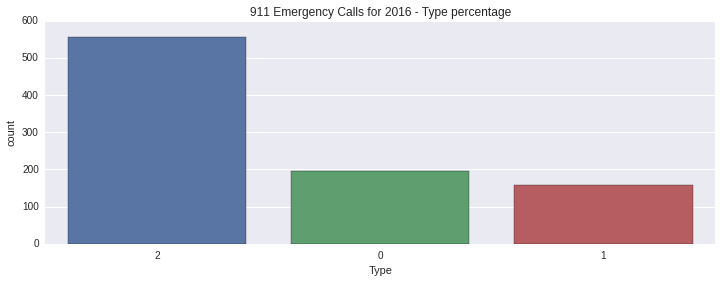

In [10]:
sns.plt.figure(figsize=(12, 4))
sns.plt.xlabel("Type")
sns.plt.xlim(0, 24)
sns.plt.title("911 Emergency Calls for 2016 - Type percentage")
sns.countplot(data[data[:, 2] == 388, 4])

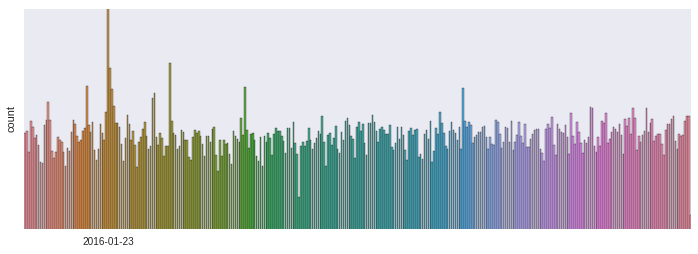

In [57]:
import matplotlib as mpl

mpl.rcParams["axes.linewidth"] = 3
sns.plt.figure(figsize=(12, 4))
sns.plt.yticks([])
x_pos = np.arange(len(["a", "b"]))
sns.countplot(data[:, 2])
sns.plt.xticks([44], ["2016-01-23"])
plt.savefig("/home/haiqw/Documents/my_papers/rare_trees/pic/countplot.eps",
            format="eps", dpi=1200, bbox_inches="tight")

In [4]:
data

array([[-75.5812935, 40.297875899999994, 344, 17, 0, 'NEW HANOVER'],
       [-75.26467990000002, 40.2580614, 344, 17, 0, 'HATFIELD TOWNSHIP'],
       [-75.3519752, 40.121181799999995, 344, 14, 1, 'NORRISTOWN'],
       ..., 
       [-75.3374519, 40.115401399999996, 690, 8, 0, 'NORRISTOWN'],
       [-75.3508942, 40.133028700000004, 690, 8, 0, 'NORRISTOWN'],
       [-75.3388642, 40.2541003, 690, 8, 0, 'TOWAMENCIN']], dtype=object)

In [5]:
labels = np.zeros(shape=(data.shape[0], 1), dtype=np.int)
labels[(data[:, 2] == 388)] = 1
labels[(data[:, 2] == 389)] = 1
data_to_save = np.append(data[:, [2, 3, 4]], labels, axis=1)
np.savetxt(X=data_to_save, 
           fname="/home/haiqw/Documents/my_projects/iforest/test/911.txt", 
           fmt="%d")

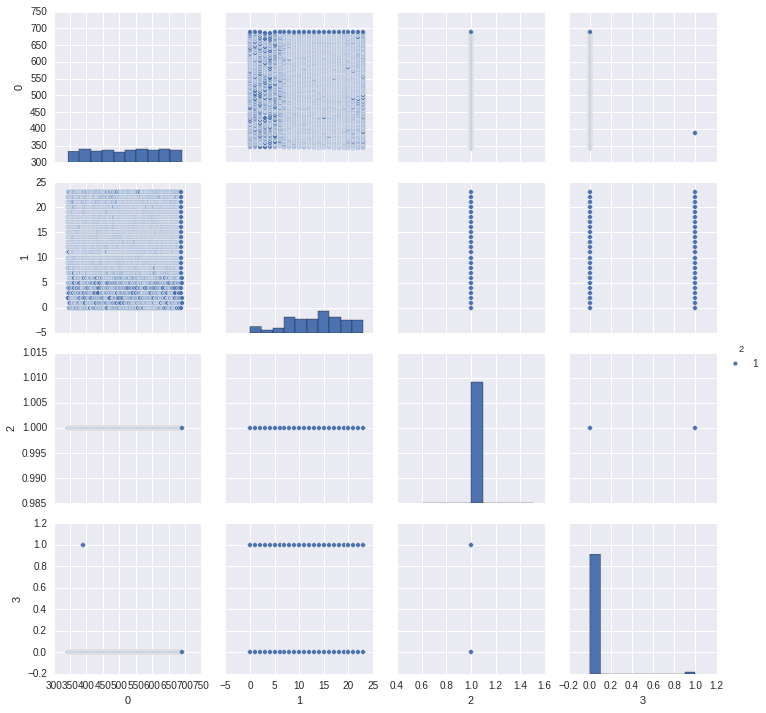

In [389]:
data_to_plot = pd.DataFrame(data_to_save)
sns.set()
sns.pairplot(data_to_plot.loc[data_to_plot.loc[:, 2] == 1, :], hue=2)

In [6]:
print ("the filtering process.")
from sklearn.cluster import KMeans
candidate_indices = np.loadtxt("/home/haiqw/Documents/my_projects/iforest/test/911_candidates_indices.txt", dtype=np.int)
candidates = data_to_save[candidate_indices, 0:data_to_save.shape[1]-1]
kmeans_model = KMeans(n_clusters=2, random_state=1).fit(candidates)
p_labels = kmeans_model.labels_

the filtering process.


In [7]:
candidates

array([[389, 23, 2],
       [389, 19, 2],
       [389, 23, 1],
       ..., 
       [376, 20, 0],
       [376, 20, 2],
       [376, 20, 1]], dtype=object)

In [8]:
np.sum(labels[candidate_indices[(p_labels == 0)]])

662

In [9]:
labels[candidate_indices[(p_labels == 0)]].shape

(1693, 1)

In [10]:
candidate_indices[(p_labels == 1)]

array([113851, 113860, 113859, 113858, 113857, 113856, 113855, 113854,
       113853, 113852, 113861, 113850, 113849, 113848, 113847, 113846,
       113845, 113844, 113843, 113842, 113870, 113879, 113878, 113877,
       113876, 113875, 113874, 113873, 113872, 113871, 113841, 113869,
       113868, 113867, 113866, 113865, 113864, 113863, 113862, 113812,
       113821, 113820, 113819, 113818, 113817, 113816, 113815, 113814,
       113813, 113822, 113811, 113810, 113809, 113808, 113807, 113806,
       113805, 113804, 113803, 113831, 113840, 113839, 113838, 113837,
       113836, 113835, 113834, 113833, 113832, 113880, 113830, 113829,
       113828, 113827, 113826, 113825, 113824, 113823, 113741, 113750,
       113749, 113748, 113747, 113746, 113745, 113744, 113743, 113742,
       113751, 113740, 113739, 113738, 113737, 113736, 113735, 113734,
       113733, 113732, 113897, 113908, 113905, 113904, 113903, 113902,
       113901, 113900, 113899, 113898, 113731, 113896, 113895, 113757,
      